In [137]:
## import all the modules need to be used
import statsmodels 
import statsmodels.tsa.stattools as tsa
import statsmodels.api as sm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

### Simulate Cointegrated series

### 1. non-cointegrated series

In [138]:
## generate four series 
size = 2001
x_t = 0
y_t = 0
x=[0]
y=[0]


for i in range(1,size):
    x_t = x_t + np.random.normal(0, 1)
    y_t = y_t + np.random.normal(0, 1)
    x.append(x_t)
    y.append(y_t)

## set up data frame with time inedx, calculate distance
df = pd.DataFrame([x,y],index=["x","y"]).T
rng = pd.date_range('1990-1-1', freq = 'D',periods=2001)
df.index = rng
df['dist'] = df.y-df.x
df.head()

,x,y,dist
1990-01-01,0.000000,0.000000,0.000000
1990-01-02,-1.175171,-0.144564,1.030607
1990-01-03,-1.111294,0.812687,1.923982
1990-01-04,0.145117,1.781648,1.636531
1990-01-05,1.039097,3.094903,2.055806


In [139]:
## define a function to plot two my one charts pannel
def plot_2_1_charts(fig1,fig2,f1_title="",f2_title="",figsize=(15,10)):  
    fig = plt.figure(figsize=figsize)
    layout = (2, 1)
    f1   = plt.subplot2grid(layout, (0, 0))
    f2 = plt.subplot2grid(layout, (1, 0))
    fig1.plot(ax=f1 )
    f1.set_title(f1_title)
    fig2.plot(ax=f2)
    f2.set_title(f2_title)
    sns.despine()
    #plt.tight_layout()

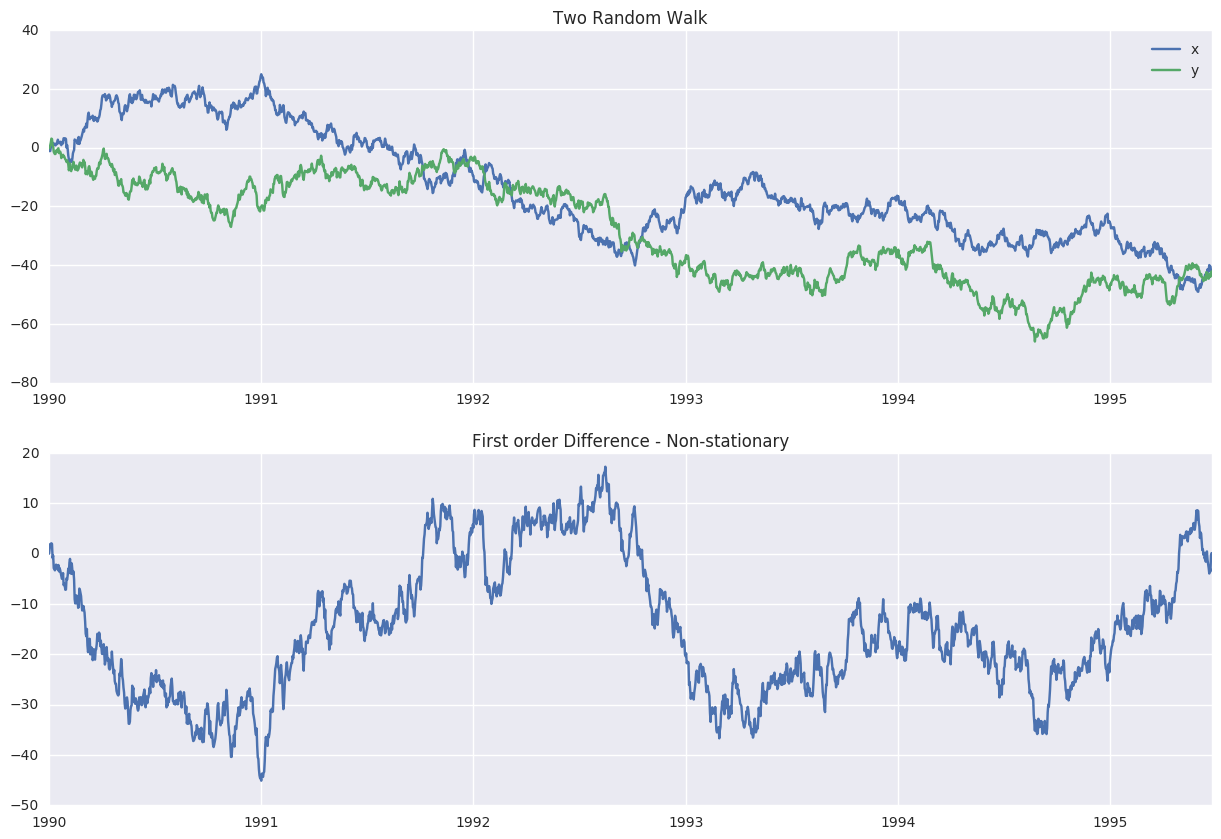

In [140]:
## take a look a the plots, looks like all of them are non-stationary
plot_2_1_charts(df[["x","y"]],df.dist,"Two Random Walk","First order Difference - Non-stationary")

### 2. Strongly conintegrated seires

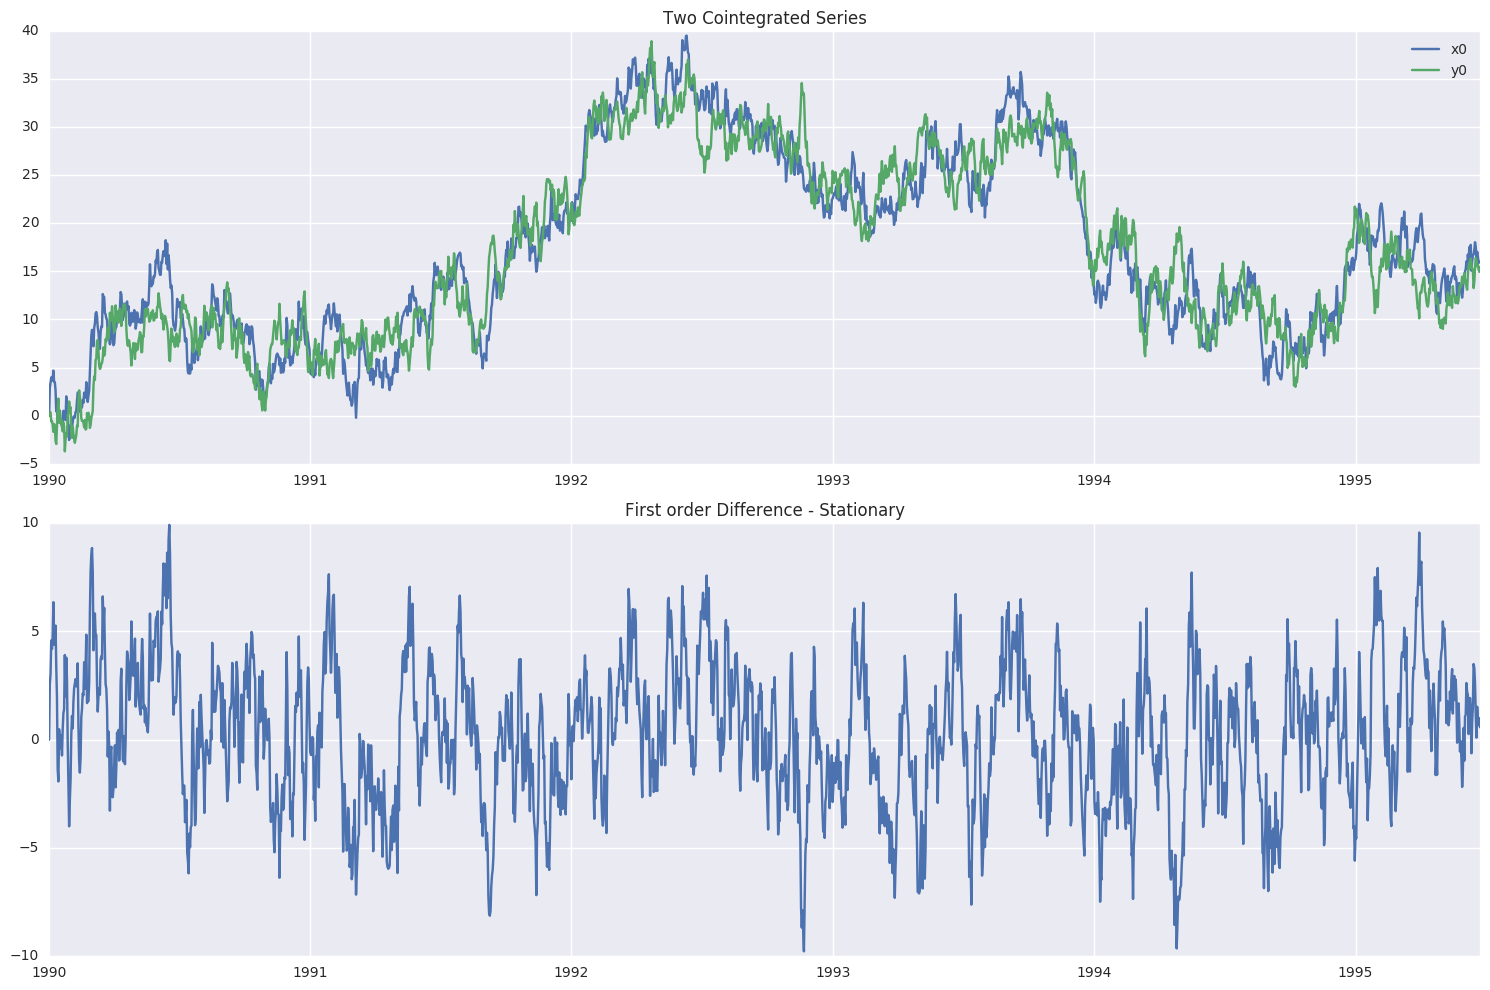

In [132]:
## simulate two cointegrated series and take the difference 
x1_t=0
y1_t=0
x1=[0]
y1=[0]

## set the cointegration coefficient to be 0.05
c=(0.05,-0.05)
for i in range(1,size):
    x0 = x1_t
    x1_t = x1_t + np.random.normal(0, 1)+c[0]*(y1_t-x1_t)    ## the part after c, is the error correction term   
    y1_t = y1_t + np.random.normal(0, 1)+c[1]*(y1_t-x0)
    x1.append(x1_t)
    y1.append(y1_t)

## merge into pandas
df1 = pd.DataFrame([x1,y1],index = ["x0","y0"]).T
df1.index = rng
df = pd.concat([df,df1],axis=1)
df["dist0"] = df.x0 - df.y0

## take a look a the plots, looks like stationary
plot_2_1_charts(df[["x0","y0"]],df.dist0,"Two Cointegrated Series","First order Difference - Stationary")

### 3. Two weakly cointegrated series

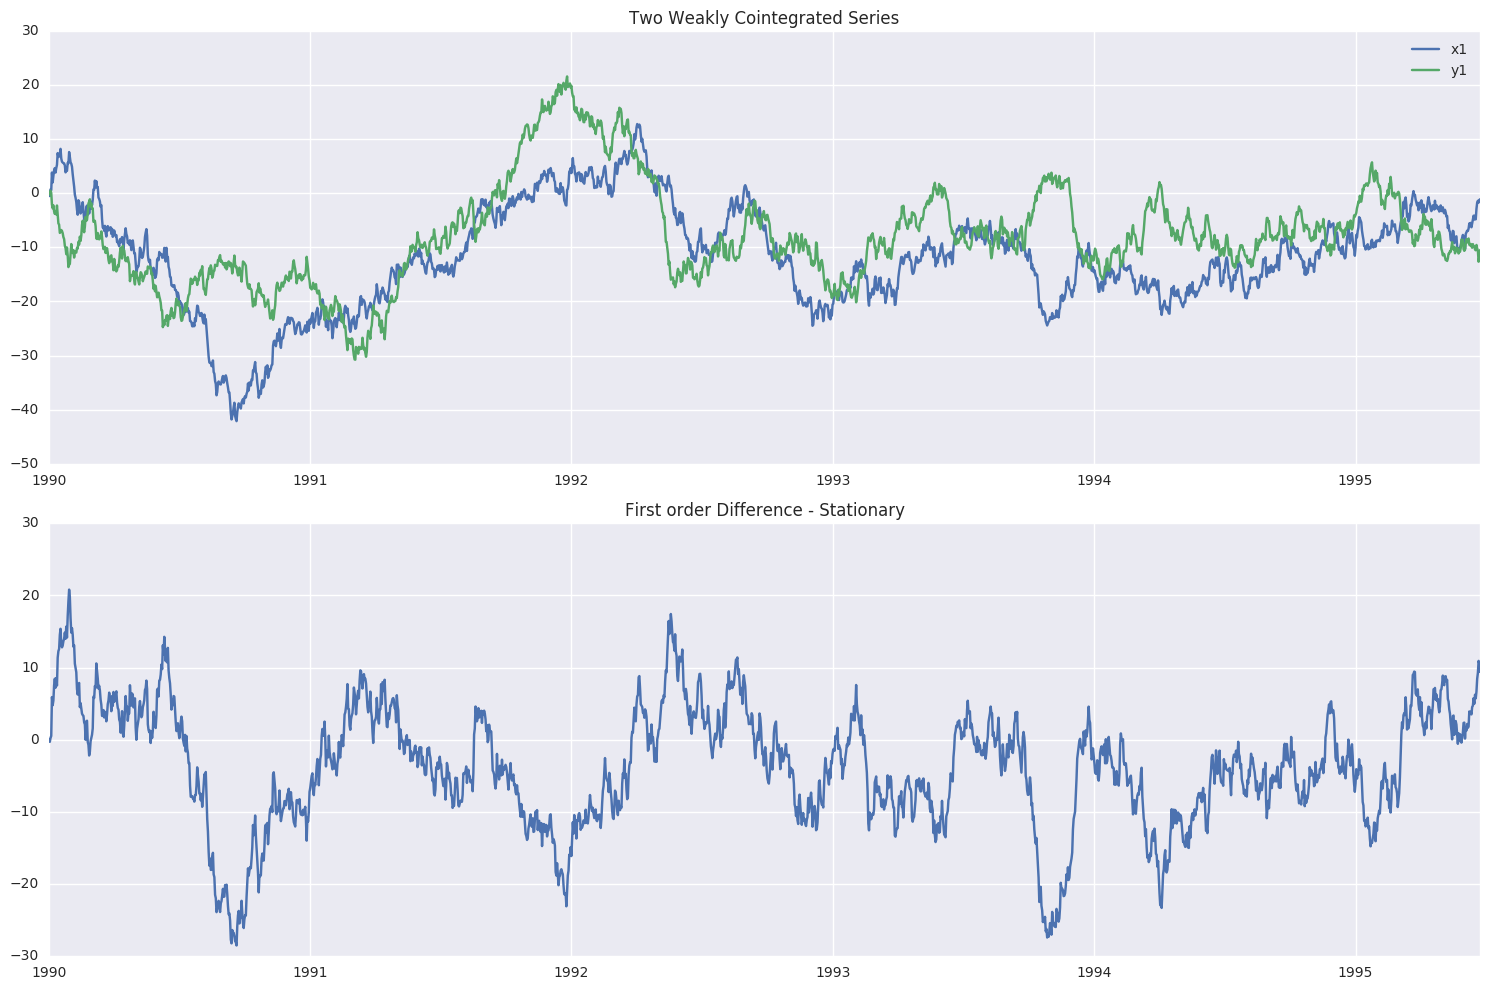

In [133]:
## simulate two week cointegrated series and take the difference 
x1_t=0
y1_t=0
x1=[0]
y1=[0]

## set the cointegration coefficient to be 0.005
c=(0.005,-0.005)
for i in range(1,size):
    x0 = x1_t
    x1_t = x1_t + np.random.normal(0, 1)+c[0]*(y1_t-x1_t)      
    y1_t = y1_t + np.random.normal(0, 1)+c[1]*(y1_t-x0)
    x1.append(x1_t)
    y1.append(y1_t)

## merge inot dataframe 
df1 = pd.DataFrame([x1,y1],index = ["x1","y1"]).T
df1.index = rng
df = pd.concat([df,df1],axis=1)
df["dist1"] = df.x1 - df.y1

## plot the line charts 
plot_2_1_charts(df[["x1","y1"]],df.dist1,"Two Weakly Cointegrated Series","First order Difference - Stationary")

### 5. if the sign of the coefficient is the same, the error correction term will be cancled out

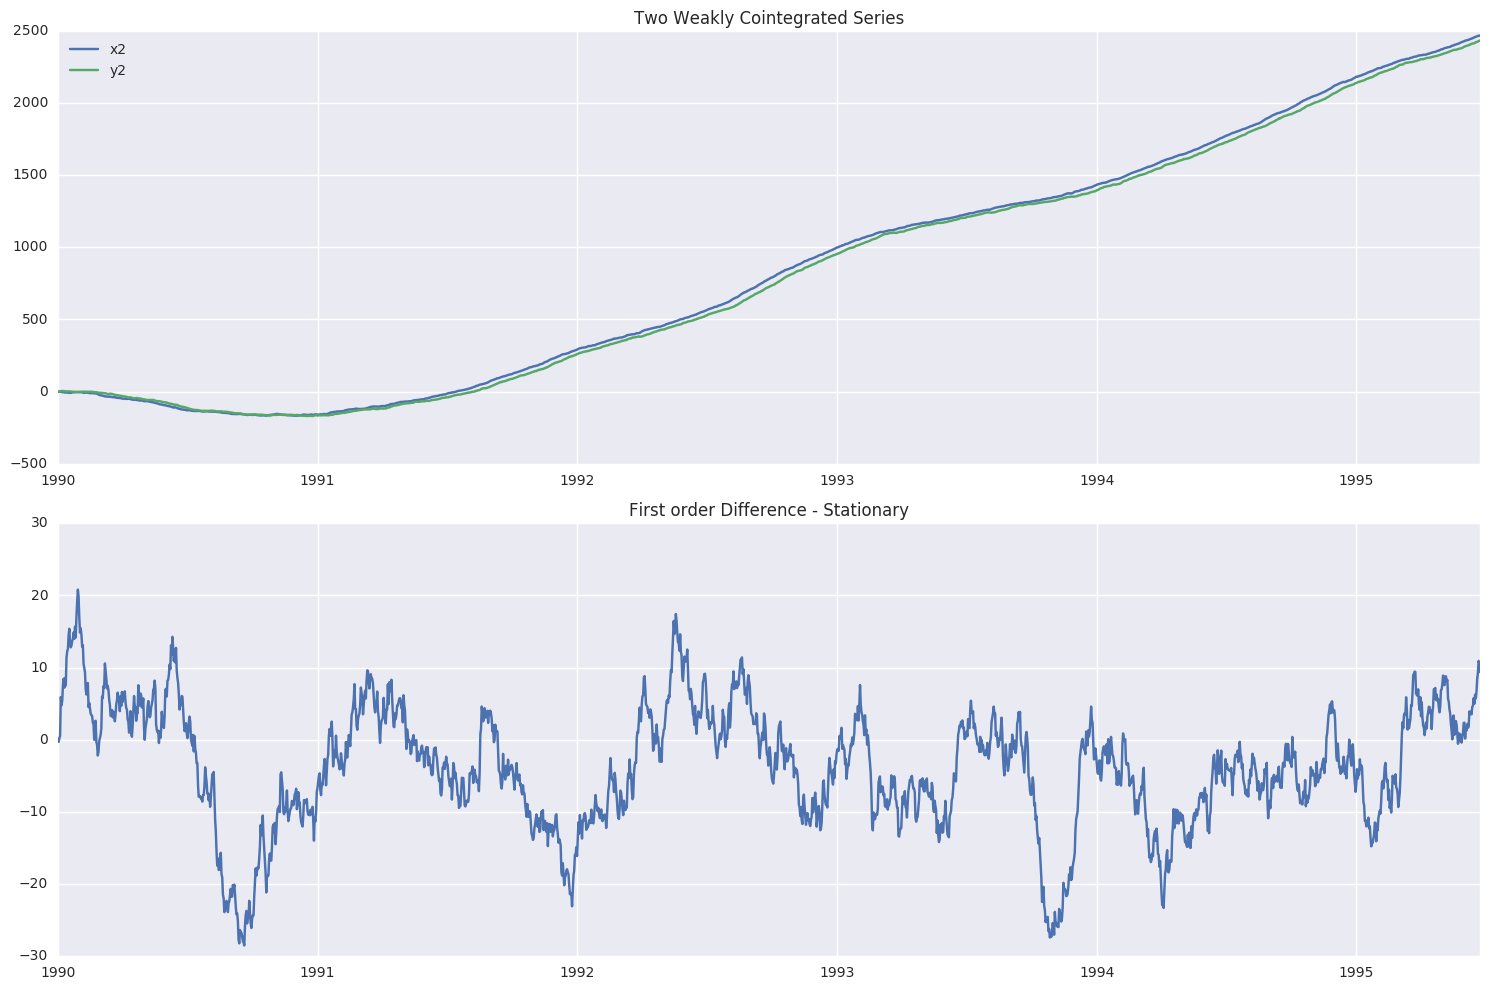

In [134]:
## simulate two week cointegrated series and take the difference 
x1_t=0
y1_t=0
x1=[0]
y1=[0]

## set the cointegration coefficient to be the same, 
## the error correction term will be cancled out 
c=(-0.05,-0.05)
for i in range(1,size):
    x0 = x1_t
    x1_t = x1_t + np.random.normal(0, 1)+c[0]*(y1_t-x1_t)      
    y1_t = y1_t + np.random.normal(0, 1)+c[1]*(y1_t-x0)
    x1.append(x1_t)
    y1.append(y1_t)

## merge inot dataframe 
df1 = pd.DataFrame([x1,y1],index = ["x2","y2"]).T
df1.index = rng
df = pd.concat([df,df1],axis=1)
df["dist2"] = df.x1 - df.y1

## plot the line charts 
plot_2_1_charts(df[["x2","y2"]],df.dist2,"Two Weakly Cointegrated Series","First order Difference - Stationary")